
- - - 
<!--NAVIGATION-->
Module 8. | **[Inheritance & Methods](./01_oop_inheritance.ipynb)** | [Half Way Knowledge Test](./04_Half_Way_Review.ipynb) | [Homework Answers](./03_inheritance_methods_exercises.ipynb)

# Inheritance

Inheritance allows us to reuse the code of an existing class `B`
in creating a new class `C`.
Let’s recap how the attribute lookup worked for classes.
When looking for an attribute, the lookup procedure starts
with the instance dictionary, and continues with the class
attributes.
If both fail, then the attribute is searched from the base
classes and, recursively, from their base classes.

So, it may look like we access an attribute of a class `C`, when
in reality we are accessing the attribute of its base class `B`.
In this case we say that the class `C` *inherits* the attribute from
its base class `B`.
If we have attributes with the same name in both the class
and its base class, the attribute of the base class is hidden.
We say that the class `C` overrides the attribute of the base
class `B`.
Terminology: `B` is a base class and `C` is a derived class.

Example:

In [1]:
class B(object):
    def f(self):
        print("Executing B.f")
    def g(self):
        print("Executing B.g")
    
class C(B):
     def g(self):
         print("Executing C.g")

A derived class is sometimes also called a *subclass* and the
base class is called *super class*.
The inheritance relation of two classes `B` and `C` can be tested
with function `issubclass`:
`issubclass(C,B)==True` but `issubclass(B,C)==False`
Function `isinstance(obj, cls)` allows us to test whether
an instance has type `cls` or has an ancestor class of type `cls`.
Let’s create instances `x=C()` and `y=B()`.
Now we have `isinstance(x,B)==
isinstance(x,C)==isinstance(y,B)==True`.
But `isinstance(y,C)==False`.

In [2]:
x=C()

In [3]:
x.f() # inherited from B

Executing B.f


In [4]:

x.g() # overridden by C

Executing C.g


### Dunder [```__mro__```](https://www.geeksforgeeks.org/method-resolution-order-in-python-inheritance/)

mro() stands for Method Resolution Order. It returns a list of types the class is derived from, in the order they are searched for methods.

In [5]:
print(B.__mro__)
print(C.mro())

(<class '__main__.B'>, <class 'object'>)
[<class '__main__.C'>, <class '__main__.B'>, <class 'object'>]


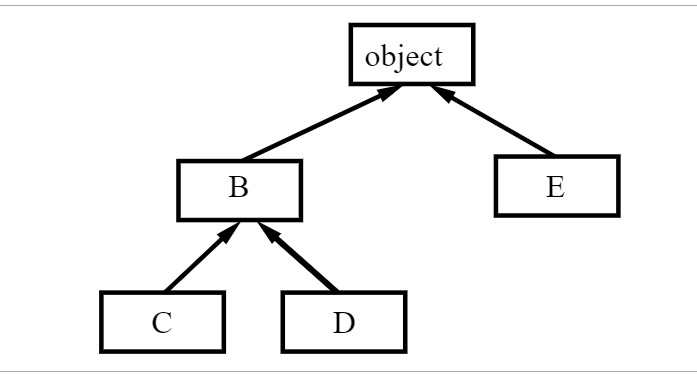

![inheritance hierarchy](https://github.com/csmastersUH/data_analysis_with_python_spring_2020/blob/master/inheritance_hierarchy.svg?raw=1)

`object` should be a base class or an ancestor class of every
other class.
This means that `isinstance(x, object)==True` for all
instances `x`.

By deriving from an existing class we can modify and/or
extend its behaviour, without touching the original class.
For example, if we want to add one method to a list class,
we can use inheritance. Therefore we have to only code the
part that has changed and reuse the rest of the code of type
list.
Another use of inheritance is to create conceptual hierarchies.
For instance, later we will learn about the exception hierarchy
of Python.
Third use would be to use classes to create interfaces. There
can be several classes that have same interface (that is, they
offer the same attributes), but their behaviour or
implementation can be very different. This allows changing a
part of your program with minimal changes required elsewhere
in the code.

If in the definition of the method `C.f` we need to call the
corresponding method of class `A`, we can use the fully qualified
call `A.f(...)`.
This is called delegation.
It is useful, for instance, when you want to call the init
method of the base class from the init of the derived
class to initialise the base class attributes.

### Special methods

We have already encountered one special method, namely the
`__init__` method.
This method sets the instance attributes to some initial value.
Its first parameter is `self`, and the subsequent parameters
are the ones that were passed to the call of the class.
The `__init__` method should return no value.
Next the main general purpose special
methods are introduced.
They are executed when certain operations on objects are
performed.

In the following, `C` is a class and `x` and `y` are its instances.
`__hash__` returns an int value, with the following
requirement: `x==y` implies `x.__hash__() == y.__hash__()`.
The value is used in storing objects in dictionaries and sets.
The instances `x` and `y` must be immutable
A class with `__call__` method makes its instances callable.
I.e. the call `x(a,b, ...)` will result in calling this special
method with the given parameters.
The method `__del__` gets called when the corresponding
instance gets deleted.
Method `__new__` is used to control the creation of new
instances. It can be used, for example, to create classes that
have only one instance.

The method `__str__` is called when the print statement needs
to print the value of an instance. It returns a string. The
print-format expression calls this for conversion `%s`.
The method `__repr__` is called when the interactive interpreter
prints the value of an evaluated expression, and when the
conversion `%r` for print-format expression is used. Returns a
canonical representation string that (at least in theory) can be
used to recreate the original object.
Special methods `__eq__`, `__ge__`, `__gt__`, `__le__`, `__lt__`, and
`__ne__` get called when the corresponding operators `x==y`,
`x>=y`, `x>y`, `x<=y`, `x<y`, and `x!=y` are used.

If you want the instances of your class to support the numeric
operations (like +, -, *, /, etc), you must define a set of
special methods in you class.
For example, the expression `x+y` will result in a call
`x.__add__(y)` which should return the result of the operation.
Here are a few of the most common numerical special
methods:

|Method|Description|
|---|------------|
|`__add__` | addition (+) |
|`__sub__` | subtraction (-) |
|`__mul__` | multiplication (*) |
|`__truediv__` | division (/) |
|`__floordiv__` | division (//) |
-----------------------

The corresponding augmented assignments += -= *= /=
have special methods iadd , isub , imul , idiv.
The conversion functions complex(), float(), int() and
long() call the following special methods:

|Method|Description|
|------|-----------|
|`__complex__` | convert to a complex number|
|`__float__` | convert to a float|
|`__int__` | convert to an integer|

In addition to the normal methods of containers, like the
`append` method of the list, there are several operations that
are handled by calls to special methods of the container class.
The test whether `x` is a member of container `c` is done by the
operation `x in c`. The corresponding special method call is
`x.__contains__(y)`.
Deletion of an element of container `c` can be done with the
operation `del c[key]`. This will result in the method call
`x.__delitem__`.

Reading an item of a container `c` is done with the operation
`c[key]`. The corresponding method call is
`c.__getitem__(key)`.
Similarly, setting an item with `c[key]=value` results in the
call `c.__setitem__(key,value)`.
The number of elements in a container `c` can be queried with
the function call `len(c)`. This function call actually calls the
special method `c.__len__`.
The call `iter(c)` will call the special method `__iter__`. 

In [ ]:
Dunder

In [ ]:
class A: 
    def rk(self): 
        print(" In class A") 
class B: 
    def rk(self): 
        print(" In class B") 
  
# classes ordering 
class C(A, B): 
    def __init__(self): 
        print("Constructor C") 
  
r = C() 
  
# it prints the lookup order  
print(C.__mro__) 
print(C.mro()) 